In [56]:
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

mpl.rcParams['figure.figsize']= (10,8)
mpl.rcParams['axes.grid']= False

In [57]:
#df=pd.read_csv('/content/peakhour.csv')

In [58]:
df = pd.read_csv('/content/Dataset_2.3.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46273 entries, 0 to 46272
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  46273 non-null  object 
 1   kVA       46273 non-null  float64
 2   Min Temp  46273 non-null  float64
 3   Max Temp  46273 non-null  float64
 4   rainfall  46273 non-null  float64
 5   Temp      46273 non-null  float64
 6   week-1    46273 non-null  float64
 7   week-2    46273 non-null  float64
 8   t-30      46273 non-null  float64
 9   t-29      46273 non-null  float64
 10  t-28      46273 non-null  float64
 11  t-27      46273 non-null  float64
 12  t-26      46273 non-null  float64
 13  t-25      46273 non-null  float64
 14  t-24      46273 non-null  float64
 15  t-23      46273 non-null  float64
 16  t-22      46273 non-null  float64
 17  t-21      46273 non-null  float64
 18  t-20      46273 non-null  float64
 19  t-19      46273 non-null  float64
 20  t-18      46273 non-null  fl

In [60]:
df['date'] = pd.to_datetime(df['DateTime'], infer_datetime_format = True)  

In [61]:
#extracting date and time
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.week
dataset["Hour"] = pd.to_datetime(df["DateTime"]).dt.hour
dataset["day"] = pd.to_datetime(df["DateTime"]).dt.day
dataset['timestamp'] = pd.to_datetime(df['DateTime'])

# Create a dictionary to map the days of the week to numerical values
day_map = {
    'Sunday': 1,
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 7
}

# Extract the day of the week from the timestamp column and map it to a numerical value
df['day_of_week'] = df['timestamp'].dt.day_name().map(day_map)
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

<ipython-input-61-60210504cef4>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.week


,kVA,Min Temp,Max Temp,rainfall,Temp,week-1,week-2,t-30,t-29,t-28,...,date,Month,Year,Date,Time,Week,Hour,day,timestamp,day_of_week
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-04-21 00:00:00,1760.0,13.0,29.6,0.0,18.0,770.0,968.000000,1012.0,836.0,836.0,...,2017-04-21 00:00:00,4,2017,2017-04-21,00:00:00,16,0,21,2017-04-21 00:00:00,6
2017-04-21 01:00:00,1320.0,13.0,29.6,0.0,18.0,726.0,798.589713,836.0,836.0,836.0,...,2017-04-21 01:00:00,4,2017,2017-04-21,01:00:00,16,1,21,2017-04-21 01:00:00,6
2017-04-21 02:00:00,880.0,13.0,29.6,0.0,15.0,704.0,682.000000,836.0,836.0,858.0,...,2017-04-21 02:00:00,4,2017,2017-04-21,02:00:00,16,2,21,2017-04-21 02:00:00,6
2017-04-21 03:00:00,946.0,13.0,29.6,0.0,15.0,704.0,682.000000,836.0,858.0,1056.0,...,2017-04-21 03:00:00,4,2017,2017-04-21,03:00:00,16,3,21,2017-04-21 03:00:00,6
2017-04-21 04:00:00,946.0,13.0,29.6,0.0,11.0,748.0,682.000000,858.0,1056.0,1386.0,...,2017-04-21 04:00:00,4,2017,2017-04-21,04:00:00,16,4,21,2017-04-21 04:00:00,6


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

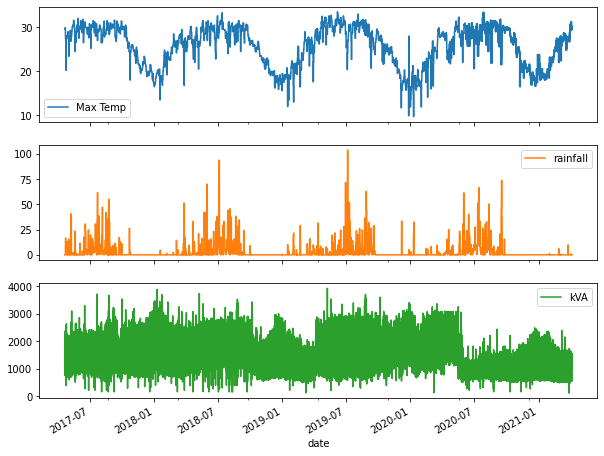

In [62]:
df.set_index('date')[['Max Temp','rainfall','kVA']].plot(subplots = True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


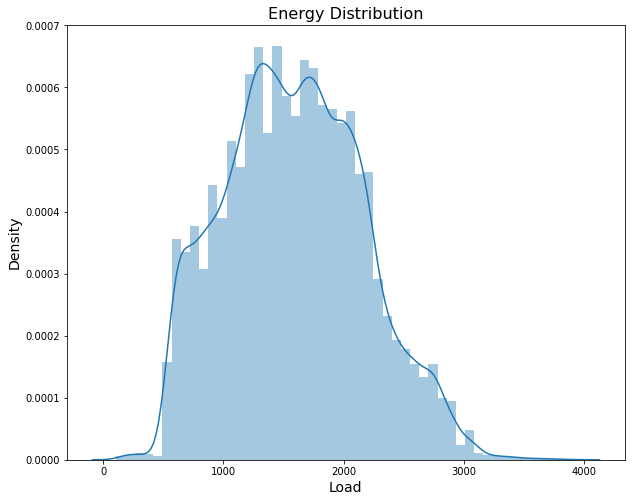

In [63]:
sns.distplot(df["kVA"])
plt.title("Energy Distribution", fontsize=16)   # set the title of the plot
plt.xlabel("Load", fontsize=14)   # set the x-axis label
plt.ylabel("Density", fontsize=14)   # set the y-axis label
plt.show()

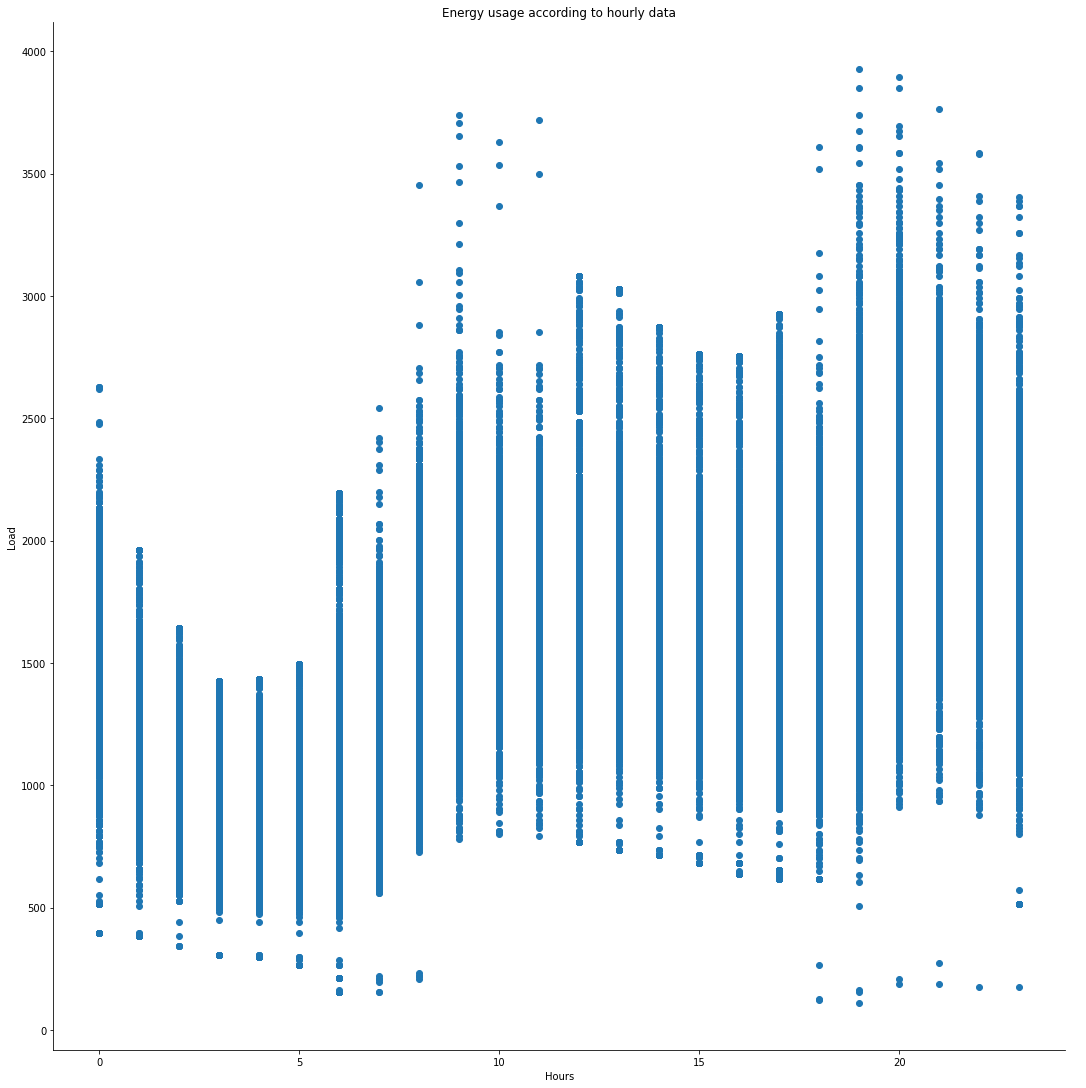

In [64]:
sns.FacetGrid(df, height = 15,).map(plt.scatter,"Hour","kVA").add_legend();
plt.xlabel("Hours")
plt.ylabel('Load')
plt.title("Energy usage according to hourly data")
plt.show()

In [65]:
result = df
#result = df.loc[df['Month'] == 4|5|6]
new_kva = df['kVA']
new_kva.replace(to_replace = 0, value = new_kva.std(), inplace=True)

In [66]:
df_input = result

In [67]:
df_input1 = result[['Hour', 'week-1','week-2','t-3','t-2','t-1','t-28','Temp']]
df_input= result[['kVA']]

In [68]:
q3 = df_input['kVA'].quantile(0.75)
iqr = df_input['kVA'].quantile(0.75) - df_input['kVA'].quantile(0.25)
threshold = q3 + 1.5 * iqr

In [69]:
q1 = df_input['kVA'].quantile(0.25)
iqr = df_input['kVA'].quantile(0.75) - df_input['kVA'].quantile(0.25)
thresholdL = q1 - 1 * iqr

In [70]:
iqr,q1

(836.0, 1166.0)

In [71]:
threshold

3256.0

In [72]:
df_input['kVA'] = df_input['kVA'].clip(upper=threshold)
df_input['kVA'] = df_input['kVA'].clip(lower=thresholdL)

<ipython-input-72-57fd93b5e8a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['kVA'] = df_input['kVA'].clip(upper=threshold)
<ipython-input-72-57fd93b5e8a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['kVA'] = df_input['kVA'].clip(lower=thresholdL)


In [73]:
thresholdL

330.0

In [74]:
df_input

,kVA
0,1760.0
1,1320.0
2,880.0
3,946.0
4,946.0
...,...
46268,1496.0
46269,1408.0
46270,1298.0
46271,1210.0


In [75]:
df_input.describe()

,kVA
count,46273.000000
mean,1588.526961
std,575.836961
min,330.000000
25%,1166.000000
50%,1562.000000
75%,2002.000000
max,3256.000000


In [76]:
df_input1.describe()

,Hour,week-1,week-2,t-3,t-2,t-1,t-28,Temp
count,46273.000000,46273.000000,46273.000000,46273.000000,46273.000000,46273.000000,46273.000000,46273.000000
mean,11.874765,1593.102309,1591.364396,1588.787609,1588.761935,1588.737688,1589.039830,18.334353
std,6.651085,576.360731,576.889007,577.467060,577.453578,577.445926,577.442709,6.225458
min,0.000000,121.000000,110.000000,110.000000,110.000000,110.000000,110.000000,0.000000
25%,6.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,14.000000
50%,11.000000,1584.000000,1573.000000,1562.000000,1562.000000,1562.000000,1570.800000,20.000000
75%,18.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,23.000000
max,23.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,32.000000


In [77]:
df_input1.head()

,Hour,week-1,week-2,t-3,t-2,t-1,t-28,Temp
0,0,770.0,968.000000,2486.0,2332.0,2002.0,836.0,18.0
1,1,726.0,798.589713,2332.0,2002.0,1760.0,836.0,18.0
2,2,704.0,682.000000,2002.0,1760.0,1320.0,858.0,15.0
3,3,704.0,682.000000,1760.0,1320.0,880.0,1056.0,15.0
4,4,748.0,682.000000,1320.0,880.0,946.0,1386.0,11.0


In [78]:
dataset_32 = df_input1.head(1)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


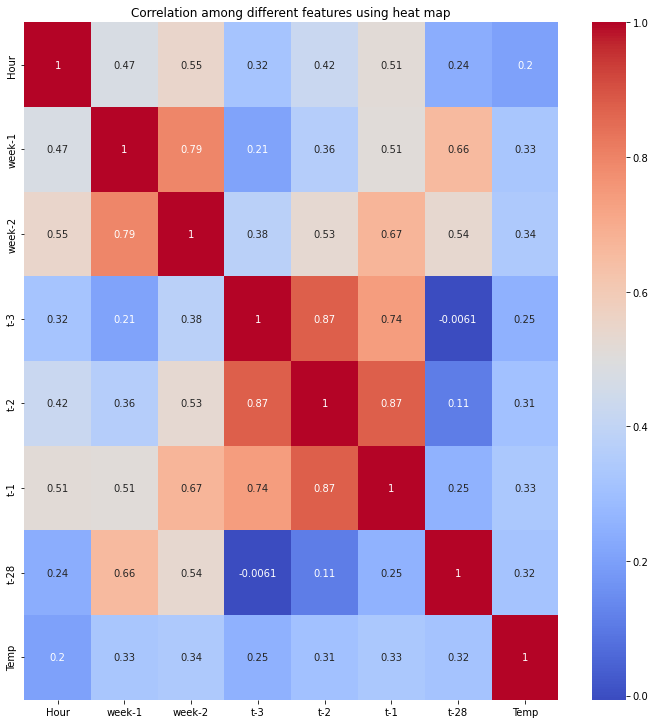

In [79]:
# Create a FacetGrid object with the desired height
g = sns.FacetGrid(df, size = 10)

# Load a sample dataset


# Compute the correlation matrix
corr = df_input1.corr()

# Generate a heatmap from the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation among different features using heat map")

# Show the plot
plt.show()

In [80]:
#scaler = MinMaxScaler()
#data_scaled = scaler.fit_transform(df_input)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_input1)
data_t = scaler.fit_transform(df_input)

In [82]:
features= data_scaled
target = data_t

In [83]:
means1 = scaler.mean_
stds1 = scaler.scale_
print("Means:", means1)
print("Standard deviations:", stds1)

Means: [1588.52696137]
Standard deviations: [575.83073855]


In [84]:
TimeseriesGenerator(features, target , length= 32 , sampling_rate =1 , batch_size=32)[0]

(array([[[-1.78540695, -1.42811812, -1.08057378, ...,  0.71568048,
          -1.30410854, -0.0537079 ],
         [-1.63505392, -1.50446002, -1.37423879, ...,  0.29658909,
          -1.30410854, -0.0537079 ],
         [-1.48470088, -1.54263097, -1.57634174, ..., -0.46539525,
          -1.26600911, -0.53560536],
         ...,
         [ 1.37200678,  0.28957471,  0.74995411, ...,  1.02047422,
          -0.46592109,  0.26755708],
         [ 1.52235981, -0.47384432,  0.44486613, ...,  0.86807735,
          -1.22790968,  0.26755708],
         [ 1.67271285, -1.16092146, -0.24158183, ...,  0.67758126,
          -1.11361139,  0.26755708]],
 
        [[-1.63505392, -1.50446002, -1.37423879, ...,  0.29658909,
          -1.30410854, -0.0537079 ],
         [-1.48470088, -1.54263097, -1.57634174, ..., -0.46539525,
          -1.26600911, -0.53560536],
         [-1.33434785, -1.54263097, -1.57634174, ..., -1.2273796 ,
          -0.92311424, -0.53560536],
         ...,
         [ 1.52235981, -0.4738443

In [85]:
features.shape

(46273, 8)

In [86]:
target.shape

(46273, 1)

In [87]:
x_train , x_test , y_train, y_test = train_test_split(features, target, test_size= 0.20 , random_state= 123, shuffle = False)

In [88]:
x_train.shape

(37018, 8)

In [89]:
x_test.shape

(9255, 8)

In [90]:
win_length = 32
batch_size =32
sr = 1
num_features = 8
train_generator = TimeseriesGenerator(x_train , y_train, length = win_length , sampling_rate =sr , batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test , y_test, length = win_length , sampling_rate =sr , batch_size = batch_size)

In [91]:
y_train.shape

(37018, 1)

In [92]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.GRU(128, input_shape=(win_length, num_features), return_sequences=True))
model1.add(tf.keras.layers.GRU(128, return_sequences=True))
model1.add(tf.keras.layers.GRU(64, return_sequences=False))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.Dense(1))

In [93]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model2.add(tf.keras.layers.LSTM(128, return_sequences=True))
model2.add(tf.keras.layers.LSTM(64, return_sequences=False))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(1))

In [94]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, input_shape = (win_length, num_features), return_sequences =True)))
model3.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences= True)))
model3.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences= False)))
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Dense(1))

In [95]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences =True)))
model4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences= True)))
model4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= False)))
model4.add(tf.keras.layers.Dropout(0.3))
model4.add(tf.keras.layers.Dense(1))

In [96]:
from tensorflow.python import losses
early_Stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience =1, 
                                                  mode ='min')
model1.compile(loss= tf.losses.MeanSquaredError(), 
              optimizer = tf.optimizers.Adamax(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.metrics.MeanAbsoluteError()] )
start_time1 = time.time()
history = model1.fit_generator(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks= [early_Stopping])

end_time1 = time.time()
training_time1 = end_time1 - start_time1

# print the training time
print("Training time: ", training_time1, " seconds")
model1.save_weights('1.h5', save_format='h5')

Epoch 1/50


<ipython-input-96-99534e15f1eb>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(train_generator, epochs = 50,


1156/1156 [==============================] - 22s 13ms/step - loss: 0.1981 - binary_accuracy: 0.0000e+00 - false_negatives_1: 23143.0000 - mean_absolute_error: 0.3088 - val_loss: 0.0964 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_1: 8732.0000 - val_mean_absolute_error: 0.2276
Epoch 2/50
1156/1156 [==============================] - 13s 12ms/step - loss: 0.1683 - binary_accuracy: 0.0000e+00 - false_negatives_1: 23226.0000 - mean_absolute_error: 0.2772 - val_loss: 0.0835 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_1: 8742.0000 - val_mean_absolute_error: 0.2125
Epoch 3/50
1156/1156 [==============================] - 14s 12ms/step - loss: 0.1558 - binary_accuracy: 0.0000e+00 - false_negatives_1: 23173.0000 - mean_absolute_error: 0.2628 - val_loss: 0.0789 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_1: 8735.0000 - val_mean_absolute_error: 0.2077
Epoch 4/50
1156/1156 [==============================] - 13s 11ms/step - loss: 0.1503 - binary_accuracy: 0.0000e+00

In [97]:
from tensorflow.python import losses
early_Stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience =1, 
                                                  mode ='min')
model2.compile(loss= tf.losses.MeanSquaredError(), 
              optimizer = tf.optimizers.Adamax(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.metrics.MeanAbsoluteError()] )
start_time2 = time.time()
history2 = model2.fit_generator(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks= [early_Stopping])

end_time2 = time.time()
training_time2 = end_time2 - start_time2

# print the training time
print("Training time: ", training_time2, " seconds")
model2.save_weights('2.h5', save_format='h5')

Epoch 1/50


<ipython-input-97-1ebb681e937f>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(train_generator, epochs = 50,


1156/1156 [==============================] - 23s 14ms/step - loss: 0.2428 - binary_accuracy: 0.0000e+00 - false_negatives_2: 23686.0000 - mean_absolute_error: 0.3491 - val_loss: 0.1823 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_2: 8765.0000 - val_mean_absolute_error: 0.3411
Epoch 2/50
1156/1156 [==============================] - 15s 13ms/step - loss: 0.2048 - binary_accuracy: 0.0000e+00 - false_negatives_2: 23308.0000 - mean_absolute_error: 0.3127 - val_loss: 0.1208 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_2: 8807.0000 - val_mean_absolute_error: 0.2739
Epoch 3/50
1156/1156 [==============================] - 15s 13ms/step - loss: 0.1952 - binary_accuracy: 0.0000e+00 - false_negatives_2: 23195.0000 - mean_absolute_error: 0.3036 - val_loss: 0.1069 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_2: 8819.0000 - val_mean_absolute_error: 0.2569
Epoch 4/50
1156/1156 [==============================] - 14s 12ms/step - loss: 0.1895 - binary_accuracy: 0.0000e+00

In [98]:
from tensorflow.python import losses
early_Stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience =1, 
                                                  mode ='min')
model3.compile(loss= tf.losses.MeanSquaredError(), 
              optimizer = tf.optimizers.Adamax(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.metrics.MeanAbsoluteError()] )
start_time3 = time.time()
history3 = model3.fit_generator(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks= [early_Stopping])

end_time3 = time.time()
training_time3 = end_time3 - start_time3

# print the training time
print("Training time: ", training_time3, " seconds")
model3.save_weights('3.h5', save_format='h5')

<ipython-input-98-7db7a5a8316c>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(train_generator, epochs = 50,


Epoch 1/50
1156/1156 [==============================] - 37s 20ms/step - loss: 0.1803 - binary_accuracy: 0.0000e+00 - false_negatives_3: 23226.0000 - mean_absolute_error: 0.2905 - val_loss: 0.1295 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_3: 8474.0000 - val_mean_absolute_error: 0.2670
Epoch 2/50
1156/1156 [==============================] - 23s 20ms/step - loss: 0.1607 - binary_accuracy: 0.0000e+00 - false_negatives_3: 23122.0000 - mean_absolute_error: 0.2682 - val_loss: 0.1020 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_3: 8611.0000 - val_mean_absolute_error: 0.2359
Epoch 3/50
1156/1156 [==============================] - 20s 18ms/step - loss: 0.1520 - binary_accuracy: 0.0000e+00 - false_negatives_3: 23122.0000 - mean_absolute_error: 0.2577 - val_loss: 0.0798 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_3: 8754.0000 - val_mean_absolute_error: 0.2082
Epoch 4/50
1156/1156 [==============================] - 21s 18ms/step - loss: 0.1478 - binary_accuracy:

In [99]:
from tensorflow.python import losses
early_Stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience =1, 
                                                  mode ='min')
model4.compile(loss= tf.losses.MeanSquaredError(), 
              optimizer = tf.optimizers.Adamax(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.metrics.MeanAbsoluteError()] )
start_time4 = time.time()
history4 = model4.fit_generator(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks= [early_Stopping])

end_time4 = time.time()
training_time4 = end_time4 - start_time4

# print the training time
print("Training time: ", training_time4, " seconds")
model4.save_weights('4.h5', save_format='h5')

<ipython-input-99-6a11408ee188>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model4.fit_generator(train_generator, epochs = 50,


Epoch 1/50
1156/1156 [==============================] - 39s 21ms/step - loss: 0.1971 - binary_accuracy: 0.0000e+00 - false_negatives_4: 23237.0000 - mean_absolute_error: 0.3050 - val_loss: 0.1145 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_4: 8563.0000 - val_mean_absolute_error: 0.2529
Epoch 2/50
1156/1156 [==============================] - 21s 18ms/step - loss: 0.1749 - binary_accuracy: 0.0000e+00 - false_negatives_4: 23102.0000 - mean_absolute_error: 0.2823 - val_loss: 0.0948 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_4: 8761.0000 - val_mean_absolute_error: 0.2325
Epoch 3/50
1156/1156 [==============================] - 22s 19ms/step - loss: 0.1645 - binary_accuracy: 0.0000e+00 - false_negatives_4: 23071.0000 - mean_absolute_error: 0.2710 - val_loss: 0.0910 - val_binary_accuracy: 0.0000e+00 - val_false_negatives_4: 8812.0000 - val_mean_absolute_error: 0.2316
Epoch 4/50
1156/1156 [==============================] - 22s 19ms/step - loss: 0.1598 - binary_accuracy:

In [100]:
model1.evaluate_generator(test_generator, verbose =0)
model2.evaluate_generator(test_generator, verbose =0)
model3.evaluate_generator(test_generator, verbose =0)
model4.evaluate_generator(test_generator, verbose =0)

<ipython-input-100-9f5e32d9bca1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model1.evaluate_generator(test_generator, verbose =0)
<ipython-input-100-9f5e32d9bca1>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model2.evaluate_generator(test_generator, verbose =0)
<ipython-input-100-9f5e32d9bca1>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model3.evaluate_generator(test_generator, verbose =0)
<ipython-input-100-9f5e32d9bca1>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model4.evaluate_generator(test_generator, verbose =0)


[0.09319011867046356, 0.0, 8887.0, 0.23574970662593842]

In [101]:
predictions1 = model1.predict_generator(test_generator)

<ipython-input-101-dc0678926118>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions1 = model1.predict_generator(test_generator)


In [102]:
predictions1 = model1.predict_generator(test_generator)
predictions2 = model2.predict_generator(test_generator)
predictions3 = model3.predict_generator(test_generator)
predictions4 = model4.predict_generator(test_generator)

<ipython-input-102-92f6207ba338>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions1 = model1.predict_generator(test_generator)
<ipython-input-102-92f6207ba338>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions2 = model2.predict_generator(test_generator)
<ipython-input-102-92f6207ba338>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions3 = model3.predict_generator(test_generator)
<ipython-input-102-92f6207ba338>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions4 = model4.predict_generator(test_generator)


In [103]:
i=predictions1.shape[0]

In [104]:
predictions1

array([[-1.0766873 ],
       [-1.0300612 ],
       [-1.0043473 ],
       ...,
       [-0.40748107],
       [-0.63485295],
       [-1.1373732 ]], dtype=float32)

In [105]:
y_test

array([[-0.92479773],
       [-0.88659206],
       [-0.9630034 ],
       ...,
       [-0.50453535],
       [-0.65735803],
       [-1.03941475]])

In [106]:
x_test

array([[ 1.22165374, -0.62652813, -0.48946581, ..., -1.13213155,
        -1.05646225, -1.33876779],
       [ 1.22165374, -0.74104099, -0.62294181, ..., -0.92258586,
        -0.7326171 , -1.41908403],
       [ 1.37200678, -0.89372479, -0.7564178 , ..., -0.88448664,
        -1.05646225, -1.49940027],
       ...,
       [ 1.67271285, -1.21817788, -0.87082579, ..., -0.31299838,
        -1.81845084,  0.10692459],
       [-1.78540695, -1.42811812, -1.32845776, ..., -0.50349447,
        -1.81845084, -0.0537079 ],
       [-1.63505392, -1.65714383, -1.70981773, ..., -0.65589134,
        -1.81845084,  0.58882205]])

In [107]:
x_test[:,1:][win_length:]

array([[-0.53110075, -0.47039782, -1.43695915, ..., -1.18928038,
        -1.18981025, -1.33876779],
       [-0.66469908, -0.52760181, -1.39886133, ..., -0.96068507,
        -0.65641824, -1.41908403],
       [-0.85555384, -0.6420098 , -1.1893233 , ..., -0.99878429,
        -1.15171082, -1.49940027],
       ...,
       [-1.21817788, -0.87082579, -0.06543753, ..., -0.31299838,
        -1.81845084,  0.10692459],
       [-1.42811812, -1.32845776, -0.16068209, ..., -0.50349447,
        -1.81845084, -0.0537079 ],
       [-1.65714383, -1.70981773, -0.31307338, ..., -0.65589134,
        -1.81845084,  0.58882205]])

In [108]:
df_pred = pd.concat([pd.DataFrame(predictions1),pd.DataFrame(predictions2),pd.DataFrame(predictions3),pd.DataFrame(predictions4), pd.DataFrame(x_test[:,1:][win_length:])],axis = 1)

In [109]:
df_pred = pd.concat([pd.DataFrame(predictions1),pd.DataFrame(predictions2),pd.DataFrame(predictions3),pd.DataFrame(predictions4), pd.DataFrame(x_test[:,1:][win_length:])],axis = 1)
rev_trans = scaler.inverse_transform(df_pred)

df_final = df_input1.iloc[predictions1.shape[0]*-1:].copy()
df_final['GRU']= rev_trans[:,0]
df_final['LSTM']= rev_trans[:,1]
df_final['BiGRU']= rev_trans[:,2]
df_final['BiLSTM']= rev_trans[:,3]

In [110]:
rev_trans.shape

(9223, 11)

In [111]:
rev_trans

array([[ 968.5372975 ,  993.26190244,  975.99262559, ...,  903.70276301,
         903.39764639,  817.62331864],
       [ 995.38603392, 1008.30229648,  995.39701702, ..., 1035.33496519,
        1210.54116258,  771.37475708],
       [1010.19289981, 1037.35740034, 1002.54591663, ..., 1013.39626483,
         925.33646897,  725.12619553],
       ...,
       [1353.88683339, 1412.34511957, 1396.69032406, ..., 1408.29287137,
         541.40707374, 1650.09742659],
       [1222.95912071, 1209.65361023, 1130.25465439, ..., 1298.59936956,
         541.40707374, 1557.60030349],
       [ 933.59250642,  975.85245378,  916.27387427, ..., 1210.8445681 ,
         541.40707374, 1927.58879591]])

In [112]:
df_final.count()

Hour      9223
week-1    9223
week-2    9223
t-3       9223
t-2       9223
t-1       9223
t-28      9223
Temp      9223
GRU       9223
LSTM      9223
BiGRU     9223
BiLSTM    9223
dtype: int64

In [113]:
#df_final['App_Pred']= rev_trans[:,0]

In [114]:
last_220 = df_input.tail(i)

In [115]:
df_pred1 = pd.concat([pd.DataFrame(df_final), pd.DataFrame(last_220)],axis = 1)

In [116]:
df_final = df_pred1

In [117]:
df_final

,Hour,week-1,week-2,t-3,t-2,t-1,t-28,Temp,GRU,LSTM,BiGRU,BiLSTM,kVA
37050,20,1287.0,1320.0,759.0,781.0,902.0,902.0,10.0,968.537298,993.261902,975.992626,1017.521030,1034.0
37051,20,1210.0,1287.0,781.0,902.0,1034.0,1210.0,9.5,995.386034,1008.302296,995.397017,1046.722621,1012.0
37052,21,1100.0,1221.0,902.0,1034.0,1012.0,924.0,9.0,1010.192900,1037.357400,1002.545917,1038.309772,957.0
37053,22,1210.0,1144.0,1034.0,1012.0,957.0,792.0,9.0,1018.744307,1044.368462,980.778717,1026.056546,924.0
37054,23,979.0,1133.0,1012.0,957.0,924.0,682.0,9.0,1004.719060,1028.409744,942.585880,992.459930,858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46268,21,1364.0,1342.0,1265.0,1386.0,1551.0,924.0,20.0,1512.344003,1631.317882,1628.666510,1687.082537,1496.0
46269,22,1243.0,1276.0,1386.0,1551.0,1496.0,770.0,20.0,1432.592258,1568.126053,1541.073158,1618.459490,1408.0
46270,23,891.0,1089.0,1551.0,1496.0,1408.0,539.0,19.0,1353.886833,1412.345120,1396.690324,1460.169697,1298.0
46271,0,770.0,825.0,1496.0,1408.0,1298.0,539.0,18.0,1222.959121,1209.653610,1130.254654,1186.476936,1210.0


<Figure size 1440x504 with 0 Axes>

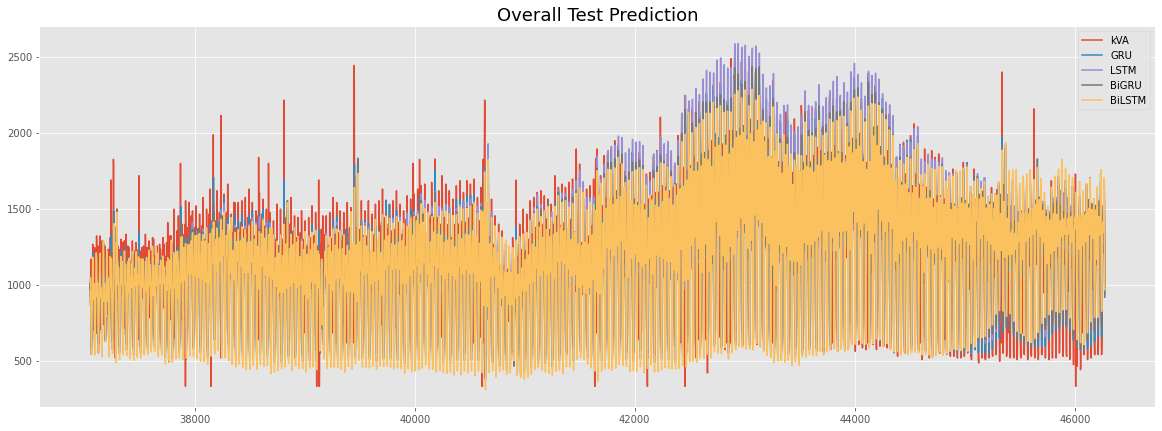

In [176]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 7))
ax = df_final[['kVA','GRU','LSTM','BiGRU','BiLSTM']].plot(figsize=(20, 7))
ax.set_title('Overall Test Prediction', fontsize=18)
plt.show()

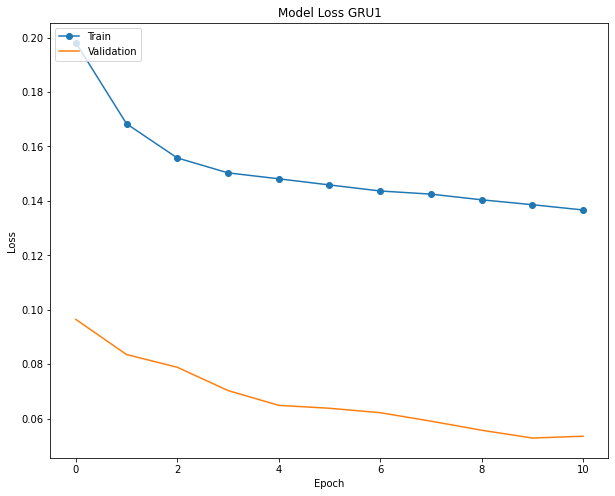

In [119]:
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'])
plt.title('Model Loss GRU1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [120]:
df_final.to_csv('BidirectionalLSTM.csv', index=False)

In [121]:
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
rmse=math.sqrt(mean_squared_error(df_final['kVA'], df_final['GRU']))
# calculate mean absolute error
mae = mean_absolute_error(df_final['kVA'], df_final['GRU'])
print("For Overall GRU:")
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("MAPE:", mean_absolute_percentage_error(df_final['kVA'], df_final['GRU'])*100,"%")
r2 = r2_score(df_final['kVA'], df_final['GRU'])
print("R-squared:", r2)

For Overall GRU:
Mean Absolute Error: 93.04878713255277
Root Mean Squared Error: 133.20405193155474
MAPE: 8.861853462419226 %
R-squared: 0.8912146479659426


In [122]:
models = ['GRU', 'LSTM', 'BiGRU', 'BiLSTM']
training_times = [training_time1, training_time2, training_time3, training_time4]
predictions = [df_final['GRU'], df_final['LSTM'], df_final['BiGRU'], df_final['BiLSTM']]

metrics = {'metric': ['RMSE', 'MAE', 'MAPE', 'R2', 'Time']}
for i, model in enumerate(models):
    rmse = math.sqrt(mean_squared_error(df_final['kVA'], predictions[i]))
    mae = mean_absolute_error(df_final['kVA'], predictions[i])
    mape = mean_absolute_percentage_error(df_final['kVA'], predictions[i])
    r2 = r2_score(df_final['kVA'], predictions[i])
    training_time = training_times[i]
    
    metrics[model] = [rmse, mae, mape, r2, training_time]

metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('error.csv', index=False)

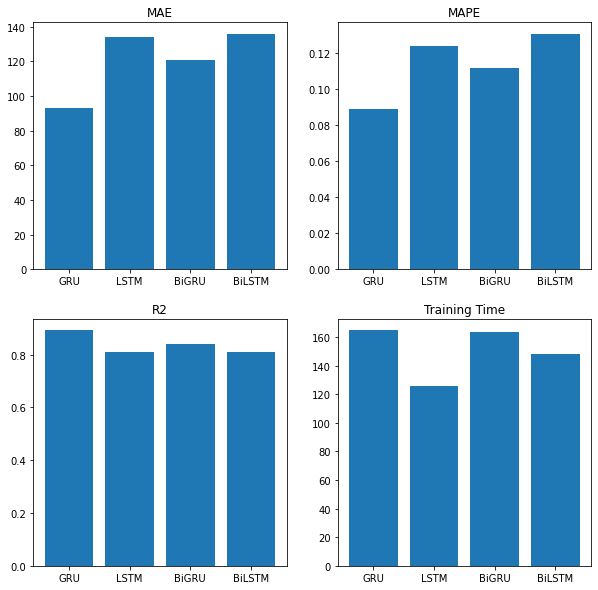

In [123]:
import matplotlib.pyplot as plt
import numpy as np

models = ['GRU', 'LSTM', 'BiGRU', 'BiLSTM']
training_times = [training_time1, training_time2, training_time3, training_time4]
predictions = [df_final['GRU'], df_final['LSTM'], df_final['BiGRU'], df_final['BiLSTM']]

metrics = {'metric': ['RMSE', 'MAE', 'MAPE', 'R2', 'Time']}
for i, model in enumerate(models):
    rmse = math.sqrt(mean_squared_error(df_final['kVA'], predictions[i]))
    mae = mean_absolute_error(df_final['kVA'], predictions[i])
    mape = mean_absolute_percentage_error(df_final['kVA'], predictions[i])
    r2 = r2_score(df_final['kVA'], predictions[i])
    training_time = training_times[i]
    
    metrics[model] = [rmse, mae, mape, r2, training_time]

mae_values = [metrics[model][1] for model in models]
mape_values = [metrics[model][2] for model in models]
r2_values = [metrics[model][3] for model in models]
training_time_values = [metrics[model][4] for model in models]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].bar(models, mae_values)
axs[0, 0].set_title('MAE')
axs[0, 1].bar(models, mape_values)
axs[0, 1].set_title('MAPE')
axs[1, 0].bar(models, r2_values)
axs[1, 0].set_title('R2')
axs[1, 1].bar(models, training_time_values)
axs[1, 1].set_title('Training Time')
plt.show()

In [124]:
import numpy as np
import math
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

start_index = 7800
end_index = start_index + 96
section_data = df_final.iloc[start_index:end_index]

models = {'GRU': section_data['GRU'], 'LSTM': section_data['LSTM'], 'BiGRU': section_data['BiGRU'], 'BiLSTM': section_data['LSTM']}
metrics = {'MAE': mean_absolute_error, 'RMSE': lambda x,y: math.sqrt(mean_squared_error(x,y)), 'MAPE': mean_absolute_percentage_error, 'R2': r2_score}

for model_name, model_data in models.items():
    errors = np.abs((section_data['kVA'] - model_data) / section_data['kVA'])
    mae = metrics['MAE'](section_data['kVA'], model_data)
    rmse = metrics['RMSE'](section_data['kVA'], model_data)
    mape = metrics['MAPE'](section_data['kVA'], model_data)
    r2 = metrics['R2'](section_data['kVA'], model_data)
    mape *= 100
    print(f'{model_name}: MAE={mae:.3f}, RMSE={rmse:.3f}, MAPE={mape:.3f}%, R2={r2:.3f}')
    
    metrics_df = pd.DataFrame({'metric': ['RMSE', 'MAE', 'MAPE', 'R2', 'Time'],
                           model_name: [rmse, mae, mape, r2, training_time]})
    metrics_df.to_csv(f'{model_name}_error_for_section.csv', index=False)


GRU: MAE=75.748, RMSE=88.045, MAPE=7.618%, R2=0.937
LSTM: MAE=100.149, RMSE=119.596, MAPE=11.396%, R2=0.883
BiGRU: MAE=62.621, RMSE=82.896, MAPE=5.837%, R2=0.944
BiLSTM: MAE=100.149, RMSE=119.596, MAPE=11.396%, R2=0.883


In [125]:
import numpy as np
# Extract the relevant section of data
start_index = 7800
end_index = start_index+ 96
section_data = df_final.iloc[start_index:end_index]

# Calculate the actual and predicted values for the section of data
actual_values = section_data['kVA']
predicted_values1 = section_data['GRU']
predicted_values2 = section_data['LSTM']
predicted_values3 = section_data['BiGRU']
predicted_values4 = section_data['LSTM']
# Calculate the absolute percentage error for each data point
ape1 = np.abs((actual_values - predicted_values1) / actual_values)
rmse1 = math.sqrt(mean_squared_error(actual_values, predicted_values1))
mae1 = mean_absolute_error(actual_values, predicted_values1)
mape1 = mean_absolute_percentage_error(actual_values, predicted_values1)
r21 = r2_score(actual_values, predicted_values1)

ape2 = np.abs((actual_values - predicted_values2) / actual_values)
rmse2 = math.sqrt(mean_squared_error(actual_values, predicted_values2))
mae2 = mean_absolute_error(actual_values, predicted_values2)
mape2 = mean_absolute_percentage_error(actual_values, predicted_values2)
r22 = r2_score(actual_values, predicted_values2)

ape3 = np.abs((actual_values - predicted_values3) / actual_values)
rmse3 = math.sqrt(mean_squared_error(actual_values, predicted_values3))
mae3 = mean_absolute_error(actual_values, predicted_values3)
mape3 = mean_absolute_percentage_error(actual_values, predicted_values3)
r23 = r2_score(actual_values, predicted_values3)

ape4 = np.abs((actual_values - predicted_values4) / actual_values)
rmse4 = math.sqrt(mean_squared_error(actual_values, predicted_values4))
mae4 = mean_absolute_error(actual_values, predicted_values4)
mape4 = mean_absolute_percentage_error(actual_values, predicted_values4)
r24 = r2_score(actual_values, predicted_values4)

# Calculate the mean absolute percentage error (MAPE) for the section of data
mape1 = np.mean(ape1) * 100
mape2 = np.mean(ape2) * 100
mape3 = np.mean(ape3) * 100
mape4 = np.mean(ape4) * 100
print("Mean Absolute Error:", mae1, mae2 , mae3, mae4)
print("Root Mean Squared Error:", rmse1, rmse2, rmse3, rmse4)
print("R-squared:", r21, r22, r23,r24)
print("MAPE(GRU,LSTM,BiGRU, BiLSTM) for the section of data from index", start_index, "to index", end_index, "is", mape1,mape2,mape3,mape4, "%")
metrics_df = pd.DataFrame({'metric': ['RMSE', 'MAE', 'MAPE', 'R2', 'Time'],
                           'GRU': [rmse1, mae1, mape1, r21,training_time1],
                           'LSTM':[rmse2, mae2, mape2, r22, training_time2],
                           'BiGRU': [rmse3, mae3, mape3, r23,training_time3],
                           'BiLSTM':[rmse4, mae4, mape4, r24,training_time4]})
metrics_df.to_csv('error_for_section.csv', index=False)

Mean Absolute Error: 75.74762479330667 100.14875784453186 62.620891343705864 100.14875784453186
Root Mean Squared Error: 88.04451219588753 119.5963736389644 82.89641186767071 119.5963736389644
R-squared: 0.936716660140113 0.8832328094903342 0.9439008509350179 0.8832328094903342
MAPE(GRU,LSTM,BiGRU, BiLSTM) for the section of data from index 7800 to index 7896 is 7.617892870173602 11.396314387668953 5.836616342116965 11.396314387668953 %


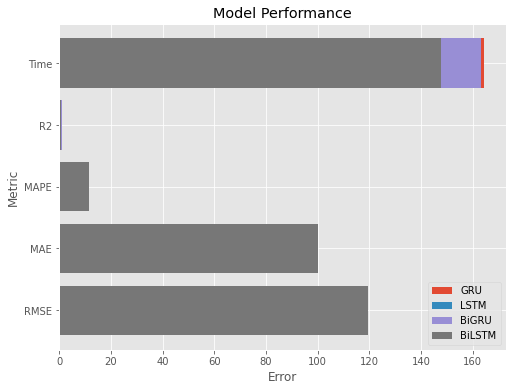

In [126]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('ggplot')

# Create a horizontal bar graph for the MAPE metric
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(metrics_df['metric'], metrics_df['GRU'], label='GRU')
ax.barh(metrics_df['metric'], metrics_df['LSTM'], label='LSTM')
ax.barh(metrics_df['metric'], metrics_df['BiGRU'], label='BiGRU')
ax.barh(metrics_df['metric'], metrics_df['BiLSTM'], label='BiLSTM')

# Set the labels and legend
ax.set_xlabel('Error')
ax.set_ylabel('Metric')
ax.set_title('Model Performance')
ax.legend()

# Display the plot
plt.show()

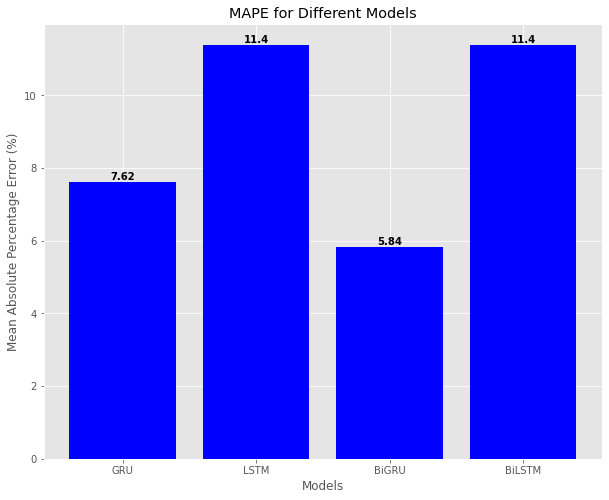

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
mape_values = [mape1, mape2, mape3, mape4]
models = ['GRU', 'LSTM', 'BiGRU', 'BiLSTM']

# Create bar chart
fig, ax = plt.subplots()
ax.bar(models, mape_values, color='blue')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Percentage Error (%)')
ax.set_title('MAPE for Different Models')

# Add values to bars
for i, v in enumerate(mape_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.show()

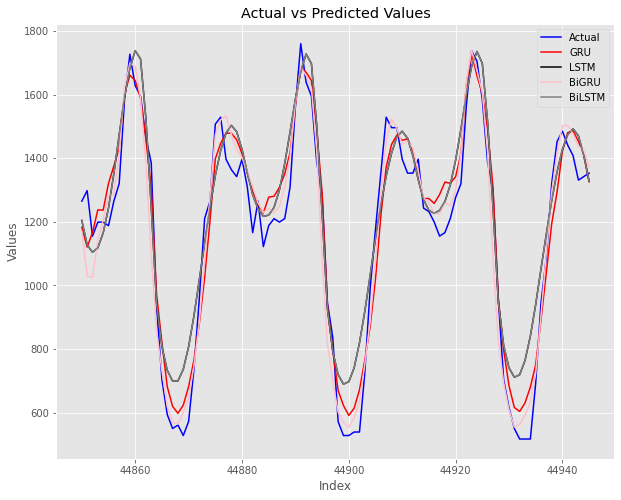

In [128]:
index_values = section_data.index

# Plot actual vs predicted values with index as x-axis and values as y-axis
plt.plot(index_values, actual_values, color='blue', label='Actual')
plt.plot(index_values, predicted_values1, color='red', label='GRU')
plt.plot(index_values, predicted_values2, color='black', label='LSTM')
plt.plot(index_values, predicted_values3, color='pink', label='BiGRU')
plt.plot(index_values, predicted_values4, color='grey', label='BiLSTM')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [167]:
from sklearn.preprocessing import StandardScaler

# assume 'model' is your trained model object
# assume 'df_input' is your input data
# assume 'scaler1' is a StandardScaler object that was used to scale the data

# Initialize the input sequence with the last 32 data points from your dataset
input_sequence = df_input1[-64:-7]
import numpy as np

# Create a 2D array with 3 rows and 4 columns
dataset = np.zeros((1,1))

# Preprocess the input sequence using the scaler object
data_scaled = scaler.fit_transform(input_sequence)

# Predict the next value using the current input sequence
pred = model1.predict(np.expand_dims(data_scaled, axis=0))

# Invert the scaling operation on the predicted value
#pred_unscaled = scaler1.inverse_transform(pred.reshape(-1, 1))

# Print the predicted values
print(pred)

1/1 [==============================] - 0s 38ms/step
[[1.3430026]]


In [168]:
input_sequence.head(5)

,Hour,week-1,week-2,t-3,t-2,t-1,t-28,Temp
46209,2,539.0,506.0,1320.0,1210.0,935.0,539.0,23.5
46210,3,528.0,517.0,1210.0,935.0,737.0,539.0,22.0
46211,4,517.0,517.0,935.0,737.0,616.0,660.0,25.0
46212,5,572.0,539.0,737.0,616.0,572.0,858.0,28.0
46213,6,616.0,539.0,616.0,572.0,561.0,1078.0,25.0


In [169]:
input_sequence.tail(5)

,Hour,week-1,week-2,t-3,t-2,t-1,t-28,Temp
46261,17,1265.0,1727.0,1254.0,1518.0,1210.0,1331.0,27.0
46262,18,1309.0,1100.0,1518.0,1210.0,1243.0,1441.0,22.0
46263,18,1430.0,110.0,1210.0,1243.0,1243.0,1573.0,27.0
46264,19,1562.0,1210.0,1243.0,1243.0,1232.0,1573.0,23.5
46265,19,1683.0,1309.0,1243.0,1232.0,1221.0,1430.0,20.0


In [170]:
print("Means:", means1)
print("Standard deviations:", stds1)

Means: [1588.52696137]
Standard deviations: [575.83073855]


In [175]:
df_final.tail(10)

,Hour,week-1,week-2,t-3,t-2,t-1,t-28,Temp,GRU,LSTM,BiGRU,BiLSTM,kVA
46263,18,1430.0,110.0,1210.0,1243.0,1243.0,1573.0,27.0,1335.592816,1368.801866,1417.196269,1509.513092,1232.0
46264,19,1562.0,1210.0,1243.0,1243.0,1232.0,1573.0,23.5,1270.994668,1421.209579,1356.123010,1415.182861,1221.0
46265,19,1683.0,1309.0,1243.0,1232.0,1221.0,1430.0,20.0,1452.038900,1490.605068,1519.820396,1529.604974,1265.0
46266,20,1562.0,1496.0,1232.0,1221.0,1265.0,1364.0,20.0,1593.942831,1561.750029,1613.459344,1636.271122,1386.0
46267,20,1430.0,1452.0,1221.0,1265.0,1386.0,1254.0,20.0,1626.147888,1617.149880,1674.276363,1704.202212,1551.0
46268,21,1364.0,1342.0,1265.0,1386.0,1551.0,924.0,20.0,1512.344003,1631.317882,1628.666510,1687.082537,1496.0
46269,22,1243.0,1276.0,1386.0,1551.0,1496.0,770.0,20.0,1432.592258,1568.126053,1541.073158,1618.459490,1408.0
46270,23,891.0,1089.0,1551.0,1496.0,1408.0,539.0,19.0,1353.886833,1412.345120,1396.690324,1460.169697,1298.0
46271,0,770.0,825.0,1496.0,1408.0,1298.0,539.0,18.0,1222.959121,1209.653610,1130.254654,1186.476936,1210.0
46272,1,638.0,605.0,1408.0,1298.0,1210.0,539.0,22.0,933.592506,975.852454,916.273874,964.936008,990.0


In [172]:
m1 = means1
s1 = stds1
value = pred

In [173]:
inverse_value = (value * s1) + m1

In [174]:
print("The next hour load will be:",inverse_value)

The next hour load will be: [[2361.86911608]]
